# Section 1 Introduction

In [1]:
import pandas as pd ##pandas is imported as pd as a shorthathand when using the library 
import numpy as np ##Numpy is imported as np as a shorthathand when using the library 
import seaborn as sns #visualisation
from sklearn.preprocessing import StandardScaler
from scipy import stats  ###used for t test
from scipy.stats import ttest_ind  ##indepent t test
import matplotlib.pyplot as plt

C:\Users\T\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
##pandas used to read in bikes dataset 
dft = pd.read_csv("BikeshareTorontoMar2023.csv")
dfla = pd.read_csv("BikeshareLAQ3.csv")





C:\Users\T\AppData\Local\Temp\ipykernel_73316\3495985673.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dfla = pd.read_csv("BikeshareLAQ3.csv")


# Section 1.1 data cleaning and exploration of LA data

In [3]:
##I had an issue with geoplot code because there was some sort of na value present.
##The code below has listed all the possible missing values. 

missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
dfla = pd.read_csv("BikeshareLAQ3.csv", na_values = missing_value_formats)

C:\Users\T\AppData\Local\Temp\ipykernel_73316\276800024.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dfla = pd.read_csv("BikeshareLAQ3.csv", na_values = missing_value_formats)


In [4]:
dfla.shape

(130753, 15)

In [5]:
dfla.isnull().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat                22
start_lon                22
end_station               0
end_lat                2061
end_lon                2061
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
bike_type                 0
dtype: int64

In [6]:
##lets look at some of the null value rows to try and find a connection between them.
rows_with_nulls = dfla[dfla.isnull().any(axis=1)]
print(rows_with_nulls)

          trip_id  duration       start_time         end_time  start_station  \
32      276705846       498    7/1/2023 2:21   7/1/2023 10:39           4627   
33      276718188       518    7/1/2023 2:27   7/1/2023 11:05           4627   
50      276668310        17    7/1/2023 6:51    7/1/2023 7:08           3011   
118     276773997         5    7/1/2023 9:03    7/1/2023 9:08           3037   
249     276745105        20   7/1/2023 10:35   7/1/2023 10:55           4523   
...           ...       ...              ...              ...            ...   
130394  307599172        10  9/30/2023 18:14  9/30/2023 18:24           4524   
130458  307599277        36  9/30/2023 18:44  9/30/2023 19:20           4214   
130493  307577452         5  9/30/2023 19:01  9/30/2023 19:06           3006   
130696  307721332        17  9/30/2023 22:20  9/30/2023 22:37           4482   
130716  307735548        15  9/30/2023 22:40  9/30/2023 22:55           4301   

        start_lat   start_lon  end_stat

In [7]:
rows_with_nulls.head(100)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
32,276705846,498,7/1/2023 2:21,7/1/2023 10:39,4627,34.101849,-118.325142,3000,NaN,NaN,30114,1,One Way,One Day Pass,electric
33,276718188,518,7/1/2023 2:27,7/1/2023 11:05,4627,34.101849,-118.325142,3000,NaN,NaN,28881,1,One Way,Walk-up,electric
50,276668310,17,7/1/2023 6:51,7/1/2023 7:08,3011,34.041130,-118.267982,3000,NaN,NaN,20119,1,One Way,One Day Pass,standard
118,276773997,5,7/1/2023 9:03,7/1/2023 9:08,3037,34.034801,-118.231277,3000,NaN,NaN,23373,365,One Way,Annual Pass,electric
249,276745105,20,7/1/2023 10:35,7/1/2023 10:55,4523,34.068748,-118.309280,3000,NaN,NaN,24046,30,One Way,Monthly Pass,electric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,278358698,4,7/6/2023 13:13,7/6/2023 13:17,3064,34.046131,-118.257591,3000,NaN,NaN,6631,365,One Way,Annual Pass,standard
7299,278612608,1278,7/6/2023 13:41,7/7/2023 10:59,4450,34.063492,-118.287163,3000,NaN,NaN,30176,30,One Way,Monthly Pass,electric
7322,278346380,12,7/6/2023 14:08,7/6/2023 14:20,3011,34.041130,-118.267982,3000,NaN,NaN,20033,30,One Way,Monthly Pass,standard
7347,278359132,28,7/6/2023 14:29,7/6/2023 14:57,4214,33.995560,-118.481552,3000,NaN,NaN,6617,1,One Way,Walk-up,standard


##Looks like mostly one-way trips result in the null values

In [8]:
#This shows me the null values aren't exclusive to One way trips
unique_trip_category = rows_with_nulls['trip_route_category'].unique()

In [9]:
unique_trip_category 

array(['One Way', 'Round Trip'], dtype=object)

In [10]:
##The information is further confirmation that the null values weren't exclusive to One way trips.

dfla_value_counts = dfla['trip_route_category'].value_counts()
print(dfla_value_counts )

trip_route_category
One Way       107025
Round Trip     23728
Name: count, dtype: int64


In [11]:
print(unique_trip_category)

['One Way' 'Round Trip']


In [12]:
value_counts = rows_with_nulls['trip_route_category'].value_counts()

print(value_counts)

trip_route_category
One Way       2041
Round Trip      20
Name: count, dtype: int64


In [13]:
# drop all rows with NaN values
dfla = dfla.dropna(axis=0)

# check if we have any NaN values in our dataset
dfla.isnull().values.any()



False

In [14]:
dfla.isnull().sum()

trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
dtype: int64

In [15]:
##Look at what the LA dataset looks like
dfla.head() 

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,276590229,1,7/1/2023 0:01,7/1/2023 0:02,4215,34.014309,-118.491341,4215,34.014309,-118.491341,30096,1,Round Trip,Walk-up,electric
1,276590710,16,7/1/2023 0:02,7/1/2023 0:18,4494,34.075981,-118.256012,3031,34.044701,-118.252441,24279,30,One Way,Monthly Pass,electric
2,276613156,148,7/1/2023 0:02,7/1/2023 2:30,4215,34.014309,-118.491341,4215,34.014309,-118.491341,30240,1,Round Trip,Walk-up,electric
3,276590579,3,7/1/2023 0:03,7/1/2023 0:06,4215,34.014309,-118.491341,4215,34.014309,-118.491341,25395,1,Round Trip,Walk-up,electric
4,276613157,146,7/1/2023 0:04,7/1/2023 2:30,4215,34.014309,-118.491341,4215,34.014309,-118.491341,30084,1,Round Trip,Walk-up,electric


In [16]:
##The describe function will allow me to see the spread of the data
dfla.describe()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
count,1.286920e+05,128692.000000,128692.000000,128692.000000,128692.000000,128692.00000,128692.000000,128692.000000,128692.000000
mean,2.922786e+08,32.772736,3997.353783,34.034002,-118.346399,4000.92604,34.033939,-118.346831,48.237637
std,8.939550e+06,83.489098,636.527030,0.038379,0.095739,633.54718,0.038029,0.096024,96.022533
min,2.765902e+08,1.000000,3005.000000,33.928459,-118.491341,3005.00000,33.928459,-118.491341,1.000000
25%,2.845527e+08,7.000000,3068.000000,34.003510,-118.451248,3068.00000,34.014309,-118.451248,1.000000
50%,2.923585e+08,16.000000,4215.000000,34.042110,-118.292183,4215.00000,34.042061,-118.294662,30.000000
75%,2.999677e+08,29.000000,4516.000000,34.051941,-118.258537,4516.00000,34.051102,-118.258537,30.000000
max,3.103289e+08,1440.000000,4660.000000,34.177650,-118.225410,4660.00000,34.177650,-118.225410,365.000000


In [17]:
##seems to be outliers because the max value for trip duration 1440 mins is way higher than the mean 32mins

<Axes: xlabel='duration'>

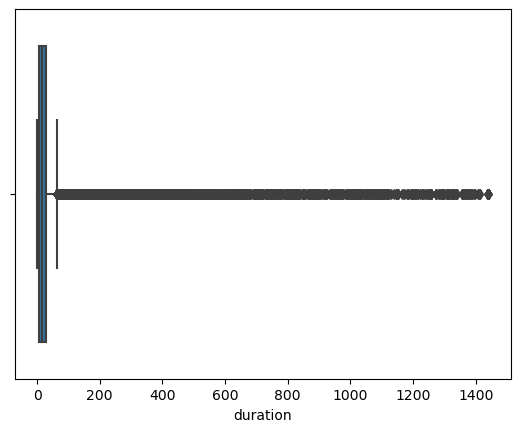

In [18]:
sns.boxplot(x=dfla["duration"])

The box plot shows that there is multiple outliers for long duration trips. 
The result is positively skewed with most of the data aggregating at the lower trip duration times.

In [19]:
dfla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128692 entries, 0 to 130752
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              128692 non-null  int64  
 1   duration             128692 non-null  int64  
 2   start_time           128692 non-null  object 
 3   end_time             128692 non-null  object 
 4   start_station        128692 non-null  int64  
 5   start_lat            128692 non-null  float64
 6   start_lon            128692 non-null  float64
 7   end_station          128692 non-null  int64  
 8   end_lat              128692 non-null  float64
 9   end_lon              128692 non-null  float64
 10  bike_id              128692 non-null  object 
 11  plan_duration        128692 non-null  int64  
 12  trip_route_category  128692 non-null  object 
 13  passholder_type      128692 non-null  object 
 14  bike_type            128692 non-null  object 
dtypes: float64(4), int64(5

In [20]:
#Transforming the data to datetime format to do datetime manipulations.
dfla['start_time'] = pd.to_datetime(dfla['start_time'], format='%m/%d/%Y %H:%M')
dfla['end_time'] = pd.to_datetime(dfla['end_time'], format='%m/%d/%Y %H:%M')


In [21]:
dfla['onlyDate'] = dfla['start_time'].dt.date

In [22]:
#Group by the date and count trips
trips_per_day = dfla.groupby('onlyDate').size().reset_index(name='num_rentals')

In [23]:
dfla_daily=trips_per_day

In [24]:
dfla_daily.describe()

,num_rentals
count,92.000000
mean,1398.826087
std,201.140846
min,195.000000
25%,1300.250000
50%,1394.000000
75%,1513.000000
max,1839.000000


In [25]:
##that minmum trip is very low compared to the mean

<Axes: xlabel='num_rentals'>

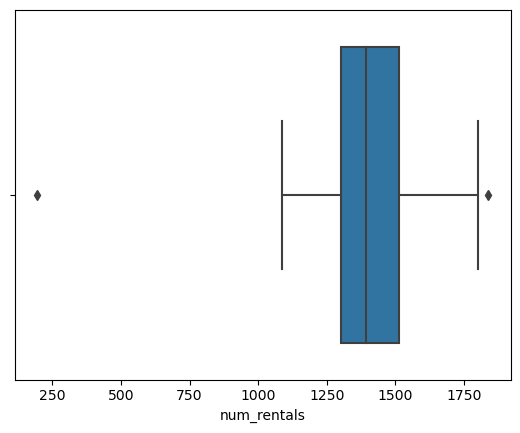

In [26]:
sns.boxplot(x=dfla_daily["num_rentals"])

In [27]:
##This visual is showing the 190 min outlier and the max outlier 1839, you can see the that 190 is far from the mean (blue box).
#most of the data falls within the IQR  wih some variability that is represented by the whiskers and the outliers.

In [28]:
##Shapiro wilk test will be used to test for normality
from scipy.stats import shapiro

In [29]:
#analysis of the dates to see if there was anything signficant happening on the outlier days.
# Calculate IQR
Q1 = dfla_daily['num_rentals'].quantile(0.25)
Q3 = dfla_daily['num_rentals'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds using standard 1.5 multiplier
#adjusting the multiplier can affect the range of outlier selection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = dfla_daily[(dfla_daily['num_rentals'] < lower_bound) | (dfla_daily['num_rentals'] > upper_bound)]
print("Outlier Dates and Counts:")
print(outliers)


Outlier Dates and Counts:
      onlyDate  num_rentals
50  2023-08-20          195
88  2023-09-27         1839


In [30]:
## 2023-08-20  is LA there was a major hurrican Hilary was on this day
#2023-09-27  Seasonal ice skating rings were open to the public 

#I have determined that the events above aren't typical to a day in LA

In [31]:
#The Shapiro-Wilk test on the 'num_rentals' column
stat, p_value = shapiro(dfla_daily['num_rentals'])

# Display the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.8434810042381287
p-value: 1.924781578566126e-08
The data does not appear to be normally distributed (reject H0).


In [32]:
#remove outliers
#This data will represent a typical rental day in LA
dfla_daily_no_outliers = dfla_daily[
    (dfla_daily['num_rentals'] >= lower_bound) & (dfla_daily['num_rentals'] <= upper_bound)
]


In [33]:
#The Shapiro-Wilk test on the 'num_rentals' column
stat, p_value = shapiro(dfla_daily_no_outliers['num_rentals'])

# Display the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.9833094477653503
p-value: 0.3036154806613922
The data appears to be normally distributed (fail to reject H0).


# Section 1.2 Data cleaning and exploration of Dublin city data

In [34]:
###12 months of data
df1 = pd.read_csv("dublinbike-historical-data-2023-01.csv")
df2 = pd.read_csv("dublinbike-historical-data-2023-02.csv")
df3 = pd.read_csv("dublinbike-historical-data-2023-03.csv")
df4 = pd.read_csv("dublinbike-historical-data-2023-04.csv")
df5 = pd.read_csv("dublinbike-historical-data-2023-05.csv")

df6 = pd.read_csv("dublinbike-historical-data-2023-06.csv")
df7 = pd.read_csv("dublinbike-historical-data-2023-07.csv")
df8 = pd.read_csv("dublinbike-historical-data-2023-08.csv")
df9 = pd.read_csv("dublinbike-historical-data-2023-09.csv")
df10 = pd.read_csv("dublinbike-historical-data-2023-10.csv")
df11 = pd.read_csv("dublinbike-historical-data-2023-11.csv")
df12 = pd.read_csv("dublinbike-historical-data-2023-12.csv")

In [35]:
###use concat to stack the data into one dataframe
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12],ignore_index=True)   

In [36]:
##to check if each variable is in the right format
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994400 entries, 0 to 1994399
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   STATION ID             int64  
 1   TIME                   object 
 2   LAST UPDATED           object 
 3   NAME                   object 
 4   BIKE_STANDS            int64  
 5   AVAILABLE_BIKE_STANDS  int64  
 6   AVAILABLE_BIKES        int64  
 7   STATUS                 object 
 8   ADDRESS                object 
 9   LATITUDE               float64
 10  LONGITUDE              float64
dtypes: float64(2), int64(4), object(5)
memory usage: 167.4+ MB


In [37]:
##rename to remove the space because spaces can cause issues when coding 
df = df.rename(columns={"STATION ID": "station_id"})
df = df.rename(columns={"LAST UPDATED":"last_reported"})
##changed the name because it's more appropriate
df = df.rename(columns={"AVAILABLE_BIKES":"num_bikes_available"})


In [38]:
#To see the spread of data
df.describe()

,station_id,BIKE_STANDS,AVAILABLE_BIKE_STANDS,num_bikes_available,LATITUDE,LONGITUDE
count,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06
mean,5.923502e+01,3.195552e+01,1.999530e+01,1.170346e+01,5.334557e+01,-6.264337e+00
std,3.683781e+01,7.520394e+00,1.109453e+01,9.797045e+00,7.579184e-03,1.791292e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.333010e+01,-6.310020e+00
25%,2.900000e+01,2.900000e+01,1.200000e+01,3.000000e+00,5.333980e+01,-6.275230e+00
50%,5.800000e+01,3.000000e+01,2.000000e+01,1.000000e+01,5.334520e+01,-6.262980e+00
75%,8.900000e+01,4.000000e+01,2.900000e+01,1.800000e+01,5.335090e+01,-6.251560e+00
max,5.070000e+02,4.000000e+01,4.000000e+01,4.000000e+01,5.336000e+01,-6.230850e+00


In [39]:
##Used to see what the dataset looks like
df.head()

,station_id,TIME,last_reported,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,num_bikes_available,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,1,2023-01-01 00:00:03,2022-12-31 23:59:39,CLARENDON ROW,31,31,0,OPEN,Clarendon Row,53.3409,-6.26250
1,2,2023-01-01 00:00:03,2022-12-31 23:57:48,BLESSINGTON STREET,20,18,2,OPEN,Blessington Street,53.3568,-6.26814
2,3,2023-01-01 00:00:03,2022-12-31 23:57:10,BOLTON STREET,20,9,11,OPEN,Bolton Street,53.3512,-6.26986
3,4,2023-01-01 00:00:03,2022-12-31 23:51:39,GREEK STREET,20,8,12,OPEN,Greek Street,53.3469,-6.27298
4,5,2023-01-01 00:00:03,2022-12-31 23:58:28,CHARLEMONT PLACE,40,16,24,OPEN,Charlemont Street,53.3307,-6.26018


In [40]:
##check the range of data
df.tail() 

,station_id,TIME,last_reported,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,num_bikes_available,STATUS,ADDRESS,LATITUDE,LONGITUDE
1994395,113,2023-12-31 23:30:02,2023-12-31 23:28:05,MERRION SQUARE SOUTH,40,25,13,OPEN,Merrion Square South,53.3386,-6.24861
1994396,114,2023-12-31 23:30:02,2023-12-31 23:29:41,WILTON TERRACE (PARK),40,22,18,OPEN,Wilton Terrace (Park),53.3337,-6.24834
1994397,115,2023-12-31 23:30:02,2023-12-31 23:20:39,KILLARNEY STREET,30,14,16,OPEN,Killarney Street,53.3548,-6.24758
1994398,116,2023-12-31 23:30:02,2023-12-31 23:27:37,BROADSTONE,30,28,2,OPEN,Broadstone,53.3547,-6.27231
1994399,117,2023-12-31 23:30:02,2023-12-31 23:27:40,HANOVER QUAY EAST,40,25,15,OPEN,Hanover Quay East,53.3437,-6.23175


In [41]:
#Used this function to check if all the columns in the dataset are in the right format.
df.dtypes  

station_id                 int64
TIME                      object
last_reported             object
NAME                      object
BIKE_STANDS                int64
AVAILABLE_BIKE_STANDS      int64
num_bikes_available        int64
STATUS                    object
ADDRESS                   object
LATITUDE                 float64
LONGITUDE                float64
dtype: object

In [42]:
##checking unique values in the dataset will help me decide what columns don't provide any useful information. 
df.nunique() 

station_id                   115
TIME                       17503
last_reported            1641091
NAME                         115
BIKE_STANDS                   18
AVAILABLE_BIKE_STANDS         41
num_bikes_available           41
STATUS                         2
ADDRESS                      115
LATITUDE                      99
LONGITUDE                    115
dtype: int64

In [43]:
####used to remove columns not required

df = df.drop(["STATUS"], axis=1)
#smaller datasets are easier to process and work with. 

In [44]:
##To see how big the dataset is 
df.shape 

(1994400, 10)

In [45]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
###number of duplicate rows is 0

number of duplicate rows:  (0, 10)


In [46]:
df.count() 

##no empty rows

station_id               1994400
TIME                     1994400
last_reported            1994400
NAME                     1994400
BIKE_STANDS              1994400
AVAILABLE_BIKE_STANDS    1994400
num_bikes_available      1994400
ADDRESS                  1994400
LATITUDE                 1994400
LONGITUDE                1994400
dtype: int64

In [47]:
print(df.isnull().sum()) ##confrimed no null

station_id               0
TIME                     0
last_reported            0
NAME                     0
BIKE_STANDS              0
AVAILABLE_BIKE_STANDS    0
num_bikes_available      0
ADDRESS                  0
LATITUDE                 0
LONGITUDE                0
dtype: int64


In [48]:
##spread of the numeric values   ##min and max very important when trying to scale the data
df.describe()  

,station_id,BIKE_STANDS,AVAILABLE_BIKE_STANDS,num_bikes_available,LATITUDE,LONGITUDE
count,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06
mean,5.923502e+01,3.195552e+01,1.999530e+01,1.170346e+01,5.334557e+01,-6.264337e+00
std,3.683781e+01,7.520394e+00,1.109453e+01,9.797045e+00,7.579184e-03,1.791292e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.333010e+01,-6.310020e+00
25%,2.900000e+01,2.900000e+01,1.200000e+01,3.000000e+00,5.333980e+01,-6.275230e+00
50%,5.800000e+01,3.000000e+01,2.000000e+01,1.000000e+01,5.334520e+01,-6.262980e+00
75%,8.900000e+01,4.000000e+01,2.900000e+01,1.800000e+01,5.335090e+01,-6.251560e+00
max,5.070000e+02,4.000000e+01,4.000000e+01,4.000000e+01,5.336000e+01,-6.230850e+00


In [49]:
##last reported is has to be in the datetime format in order to do datetime manipulations
df['last_reported'] = pd.to_datetime(df['last_reported'], format='%Y-%m-%d %H:%M:%S') 

In [50]:
df.sort_values(by=['station_id', 'last_reported'], inplace=True)
df['num_bikes_change'] = df.groupby('station_id')['num_bikes_available'].diff().fillna(0) ##groups the dataset by station id and the number of available bikes and gets the difference from one row to the next
df['num_rentals'] = df['num_bikes_change'].clip(upper=0).abs().fillna(0) ##the change in bikes are placed ina column called the number of bike rentals 

In [51]:
##checking what the dataset looks like after the addition of the number of rentals and number of bike change columns
df.head() 

,station_id,TIME,last_reported,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,num_bikes_available,ADDRESS,LATITUDE,LONGITUDE,num_bikes_change,num_rentals
0,1,2023-01-01 00:00:03,2022-12-31 23:59:39,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,0.0,0.0
113,1,2023-01-01 00:30:02,2023-01-01 00:21:23,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,0.0,0.0
226,1,2023-01-01 01:00:03,2023-01-01 00:50:23,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,0.0,0.0
339,1,2023-01-01 01:30:03,2023-01-01 01:20:40,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,0.0,0.0
452,1,2023-01-01 02:00:03,2023-01-01 01:50:55,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,0.0,0.0


In [52]:
df.tail()

,station_id,TIME,last_reported,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,num_bikes_available,ADDRESS,LATITUDE,LONGITUDE,num_bikes_change,num_rentals
720673,507,2023-05-13 00:30:02,2023-05-04 09:50:58,ORIEL STREET TEST TERMINAL,1,0,1,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,0.0,0.0
720788,507,2023-05-13 01:00:04,2023-05-04 09:50:58,ORIEL STREET TEST TERMINAL,1,0,1,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,0.0,0.0
720903,507,2023-05-13 01:30:03,2023-05-04 09:50:58,ORIEL STREET TEST TERMINAL,1,0,1,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,0.0,0.0
721018,507,2023-05-13 02:00:04,2023-05-04 09:50:58,ORIEL STREET TEST TERMINAL,1,0,1,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,0.0,0.0
721133,507,2023-05-13 02:30:03,2023-05-04 09:50:58,ORIEL STREET TEST TERMINAL,1,0,1,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,0.0,0.0


In [53]:
##Used to check the size of the dataset
df.shape 

(1994400, 12)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1994400 entries, 0 to 721133
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   station_id             int64         
 1   TIME                   object        
 2   last_reported          datetime64[ns]
 3   NAME                   object        
 4   BIKE_STANDS            int64         
 5   AVAILABLE_BIKE_STANDS  int64         
 6   num_bikes_available    int64         
 7   ADDRESS                object        
 8   LATITUDE               float64       
 9   LONGITUDE              float64       
 10  num_bikes_change       float64       
 11  num_rentals            float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 197.8+ MB


In [55]:
##extracting addtional columns to gain more insight in cycling in dublin 
df['date'] = df['last_reported'].dt.date  
df['year'] = df['last_reported'].dt.year
df['day_of_week'] =df['last_reported'].dt.dayofweek
df['day_of_week_name'] = df['last_reported'].dt.day_name()
df['month'] = df['last_reported'].dt.month
df['month_name'] = df['last_reported'].dt.month_name()
df['day_of_month'] = df['last_reported'].dt.day
df['hour_of_day'] = df['last_reported'].dt.hour

In [56]:
###Adding weekday and weekend columns 
df['is_weekend'] = df['last_reported'].dt.day_name().isin(['Saturday', 'Sunday'])
df.head()

,station_id,TIME,last_reported,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,num_bikes_available,ADDRESS,LATITUDE,LONGITUDE,...,num_rentals,date,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day,is_weekend
0,1,2023-01-01 00:00:03,2022-12-31 23:59:39,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2022-12-31,2022,5,Saturday,12,December,31,23,True
113,1,2023-01-01 00:30:02,2023-01-01 00:21:23,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2023-01-01,2023,6,Sunday,1,January,1,0,True
226,1,2023-01-01 01:00:03,2023-01-01 00:50:23,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2023-01-01,2023,6,Sunday,1,January,1,0,True
339,1,2023-01-01 01:30:03,2023-01-01 01:20:40,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2023-01-01,2023,6,Sunday,1,January,1,1,True
452,1,2023-01-01 02:00:03,2023-01-01 01:50:55,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2023-01-01,2023,6,Sunday,1,January,1,1,True


In [57]:
df.head()

,station_id,TIME,last_reported,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,num_bikes_available,ADDRESS,LATITUDE,LONGITUDE,...,num_rentals,date,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day,is_weekend
0,1,2023-01-01 00:00:03,2022-12-31 23:59:39,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2022-12-31,2022,5,Saturday,12,December,31,23,True
113,1,2023-01-01 00:30:02,2023-01-01 00:21:23,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2023-01-01,2023,6,Sunday,1,January,1,0,True
226,1,2023-01-01 01:00:03,2023-01-01 00:50:23,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2023-01-01,2023,6,Sunday,1,January,1,0,True
339,1,2023-01-01 01:30:03,2023-01-01 01:20:40,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2023-01-01,2023,6,Sunday,1,January,1,1,True
452,1,2023-01-01 02:00:03,2023-01-01 01:50:55,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2023-01-01,2023,6,Sunday,1,January,1,1,True


In [58]:
##check the format of the new date columns
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1994400 entries, 0 to 721133
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   station_id             int64         
 1   TIME                   object        
 2   last_reported          datetime64[ns]
 3   NAME                   object        
 4   BIKE_STANDS            int64         
 5   AVAILABLE_BIKE_STANDS  int64         
 6   num_bikes_available    int64         
 7   ADDRESS                object        
 8   LATITUDE               float64       
 9   LONGITUDE              float64       
 10  num_bikes_change       float64       
 11  num_rentals            float64       
 12  date                   object        
 13  year                   int32         
 14  day_of_week            int32         
 15  day_of_week_name       object        
 16  month                  int32         
 17  month_name             object        
 18  day_of_month           int32

In [59]:
##making a dataset with the focus on the number of rentals to join with the weather dataset
df_daily = df.groupby(['date']).agg({'num_rentals': np.sum}) 

C:\Users\T\AppData\Local\Temp\ipykernel_73316\1221238071.py:2: FutureWarning: The provided callable <function sum at 0x000001ABA962F240> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_daily = df.groupby(['date']).agg({'num_rentals': np.sum})


In [60]:
df_daily.head()

,num_rentals
date,
2022-12-31,0.0
2023-01-01,1122.0
2023-01-02,1413.0
2023-01-03,2555.0
2023-01-04,2757.0


In [61]:
##shape makes sense its the last day in 2022 to the last day in 2023 
df_daily.shape 

(366, 1)

In [62]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2022-12-31 to 2023-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_rentals  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [63]:
##initialise the new  reset index the reset of the index will extract the date column from the index
df_dailyt = df_daily.reset_index() 

In [64]:
##2 columns now , it was perviously 1  --> I need to do this so I can join with the weather dataset
df_dailyt.shape 

(366, 2)

In [65]:
df_dailyt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         366 non-null    object 
 1   num_rentals  366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [66]:
df_dailyt.head()

,date,num_rentals
0,2022-12-31,0.0
1,2023-01-01,1122.0
2,2023-01-02,1413.0
3,2023-01-03,2555.0
4,2023-01-04,2757.0


In [67]:
 ###Had to bring this to a date format to the same date format as the weather data.I can now join both datasets on the date column
df_dailyt['date'] = pd.to_datetime(df_dailyt['date'], format='%Y-%m-%d') 

In [68]:
##extracting addtional columns to gain more insight in cycling in dublin 
  
df_dailyt['year'] = df['last_reported'].dt.year
df_dailyt['day_of_week'] =df['last_reported'].dt.dayofweek
df_dailyt['day_of_week_name'] = df['last_reported'].dt.day_name()
df_dailyt['month'] = df['last_reported'].dt.month
df_dailyt['month_name'] = df['last_reported'].dt.month_name()
df_dailyt['day_of_month'] = df['last_reported'].dt.day
df_dailyt['hour_of_day'] = df['last_reported'].dt.hour  


In [69]:
##summary data for the continous columns
df_dailyt.describe()  

,date,num_rentals,year,day_of_week,month,day_of_month,hour_of_day
count,366,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2023-07-01 12:00:00.000000256,2916.994536,2022.691257,5.691257,4.396175,10.262295,7.174863
min,2022-12-31 00:00:00,0.000000,2022.000000,5.000000,1.000000,1.000000,0.000000
25%,2023-04-01 06:00:00,2227.750000,2022.000000,5.000000,1.000000,1.000000,0.000000
50%,2023-07-01 12:00:00,3193.500000,2023.000000,6.000000,1.000000,1.000000,0.000000
75%,2023-09-30 18:00:00,3561.750000,2023.000000,6.000000,12.000000,31.000000,23.000000
max,2023-12-31 00:00:00,4115.000000,2023.000000,6.000000,12.000000,31.000000,23.000000
std,NaN,785.790209,0.462607,0.462607,5.088681,13.878220,10.593719


In [70]:
##its clear that there are outliers present in the dataset with the min being 0 
#I will investigate this further 

<Axes: xlabel='num_rentals'>

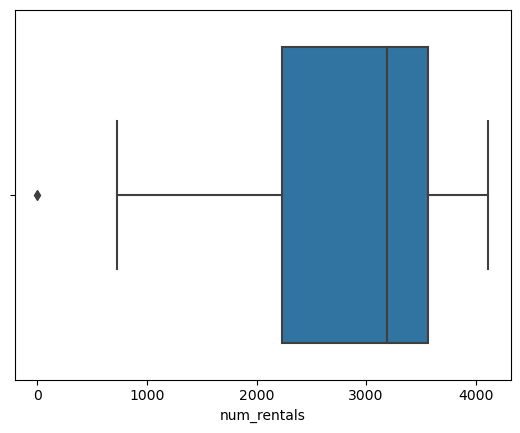

In [71]:
sns.boxplot(x=df_dailyt["num_rentals"])

In [72]:
##remove the 0 rentals
df_dailyt = df_dailyt[df_dailyt['num_rentals'] != 0]

In [73]:
df_dailyt.head()

,date,num_rentals,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day
1,2023-01-01,1122.0,2022,5,Saturday,12,December,31,23
2,2023-01-02,1413.0,2022,5,Saturday,12,December,31,23
3,2023-01-03,2555.0,2022,5,Saturday,12,December,31,23
4,2023-01-04,2757.0,2022,5,Saturday,12,December,31,23
5,2023-01-05,2811.0,2022,5,Saturday,12,December,31,23


In [74]:
#analysis of the dates to see if there was anything signficant happening on the outlier days.
# Calculate IQR
Q1 = df_dailyt['num_rentals'].quantile(0.25)
Q3 = df_dailyt['num_rentals'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds using standard 1.5 multiplier
#adjusting the multiplier can affect the range of outlier selection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df_dailyt[(df_dailyt['num_rentals'] < lower_bound) | (df_dailyt['num_rentals'] > upper_bound)]
print("Outlier Dates and Counts:")
print(outliers)


Outlier Dates and Counts:
Empty DataFrame
Columns: [date, num_rentals, year, day_of_week, day_of_week_name, month, month_name, day_of_month, hour_of_day]
Index: []


In [75]:
df_dailyt.head()

,date,num_rentals,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day
1,2023-01-01,1122.0,2022,5,Saturday,12,December,31,23
2,2023-01-02,1413.0,2022,5,Saturday,12,December,31,23
3,2023-01-03,2555.0,2022,5,Saturday,12,December,31,23
4,2023-01-04,2757.0,2022,5,Saturday,12,December,31,23
5,2023-01-05,2811.0,2022,5,Saturday,12,December,31,23


In [76]:
#The Shapiro-Wilk test on the 'num_rentals' column
stat, p_value = shapiro(df_dailyt['num_rentals'])

# Display the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.9133687615394592
p-value: 1.2312256791359444e-13
The data does not appear to be normally distributed (reject H0).


In [77]:
##Working of the assumption that nice weather results in more rentals, and inversely bad weather results in bad weather.
monthly_rentals = df.groupby('month_name')['num_rentals'].sum()


In [78]:
print(monthly_rentals)

month_name
April         85348.0
August        92858.0
December      71360.0
February      82131.0
January       82202.0
July          91375.0
June          96488.0
March         88291.0
May          102553.0
November      90221.0
October       93294.0
September     91499.0
Name: num_rentals, dtype: float64


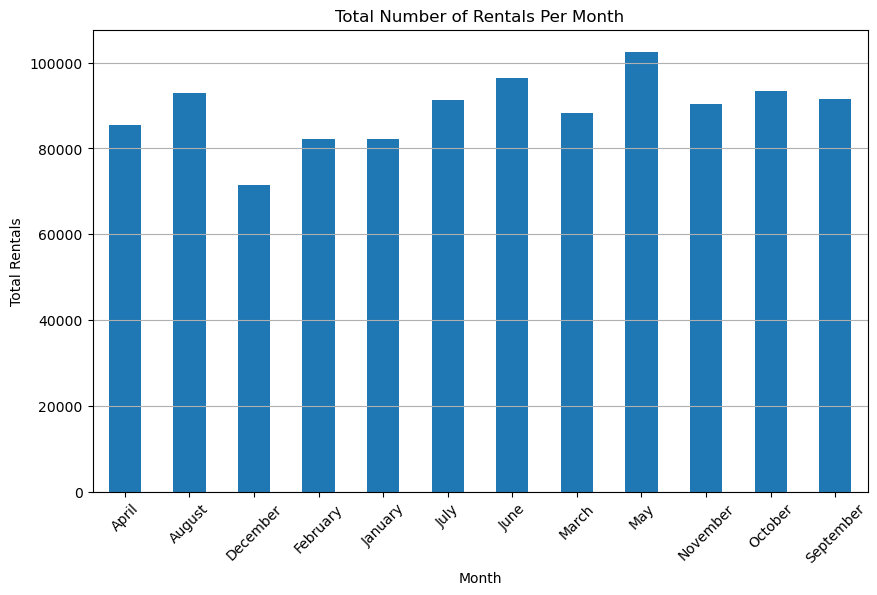

In [79]:
# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_rentals.plot(kind='bar')
plt.title('Total Number of Rentals Per Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [80]:
###data appears to be not normal so I will take July hourly rentals 

#filter for the month of July
df_hourly_july = df[df['month_name'] == 'July']


In [81]:
##extract the hour 

df_hourly_july['hour'] = df_hourly_july['last_reported'].dt.hour

C:\Users\T\AppData\Local\Temp\ipykernel_73316\399404220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hourly_july['hour'] = df_hourly_july['last_reported'].dt.hour


In [82]:
##group the number of rentals per hour 
rentals_per_hour_july = df_hourly_july.groupby(['last_reported', 'hour'])['num_rentals'].sum().reset_index()


In [83]:
rentals_per_hour_july.head()

,last_reported,hour,num_rentals
0,2023-07-01 00:19:53,0,0.0
1,2023-07-01 00:19:57,0,0.0
2,2023-07-01 00:20:01,0,0.0
3,2023-07-01 00:20:05,0,0.0
4,2023-07-01 00:20:07,0,0.0


In [84]:
unique_rentals = rentals_per_hour_july['num_rentals'].unique()

print(unique_rentals)

[ 0.  1.  2.  4.  5.  3. 17. 11. 13. 12. 18. 20.  8.  9.  6. 14. 16. 10.
  7. 15. 19. 25. 24. 21. 27. 23. 26. 22. 29.]


In [85]:
 #Filter data between 9:00 AM (hour 9) and 12:00 AM (hour 23)
filtered_data = rentals_per_hour_july[(rentals_per_hour_july['hour'] >= 9) & (rentals_per_hour_july['hour'] <= 23)]

In [86]:
#The Shapiro-Wilk test on the 'num_rentals' column
stat, p_value = shapiro(filtered_data['num_rentals'])

# Display the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.4920065999031067
p-value: 0.0
The data does not appear to be normally distributed (reject H0).


C:\Users\T\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [87]:
##gaind lots of information but no normal data 

#Log data 

df_dailyt.head()

,date,num_rentals,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day
1,2023-01-01,1122.0,2022,5,Saturday,12,December,31,23
2,2023-01-02,1413.0,2022,5,Saturday,12,December,31,23
3,2023-01-03,2555.0,2022,5,Saturday,12,December,31,23
4,2023-01-04,2757.0,2022,5,Saturday,12,December,31,23
5,2023-01-05,2811.0,2022,5,Saturday,12,December,31,23


In [88]:
##Date wasn't in the datetime format for some reason
df_dailyt['date'] = pd.to_datetime(df_dailyt['date'])

In [89]:
Q1 = df_dailyt[(df_dailyt['date'] >= '2023-01-01') & (df_dailyt['date'] <= '2023-03-31')]


<Axes: xlabel='num_rentals'>

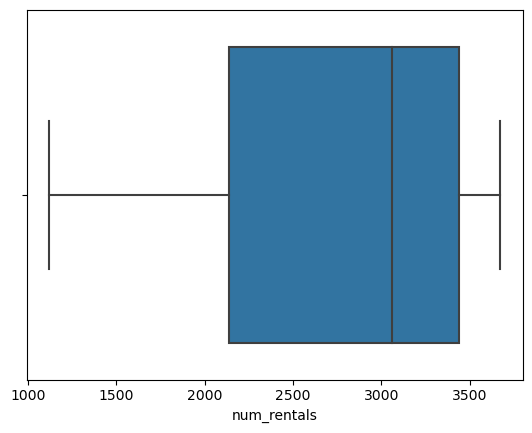

In [90]:
sns.boxplot(x=Q1["num_rentals"]) ##the data is skewed 

In [91]:
df_dailyt['is_weekend'] = df_dailyt['date'].dt.day_name().isin(['Saturday', 'Sunday'])

In [92]:
df_dailyt['is_weekday'] = ~df_dailyt['is_weekend']  

In [93]:
df_dailyt.head()

,date,num_rentals,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day,is_weekend,is_weekday
1,2023-01-01,1122.0,2022,5,Saturday,12,December,31,23,True,False
2,2023-01-02,1413.0,2022,5,Saturday,12,December,31,23,False,True
3,2023-01-03,2555.0,2022,5,Saturday,12,December,31,23,False,True
4,2023-01-04,2757.0,2022,5,Saturday,12,December,31,23,False,True
5,2023-01-05,2811.0,2022,5,Saturday,12,December,31,23,False,True


In [94]:
# Separate weekend and weekday data
weekend_rentals = df_dailyt[df_dailyt['is_weekend'] == True]['num_rentals']
weekday_rentals = df_dailyt[df_dailyt['is_weekday'] == True]['num_rentals']

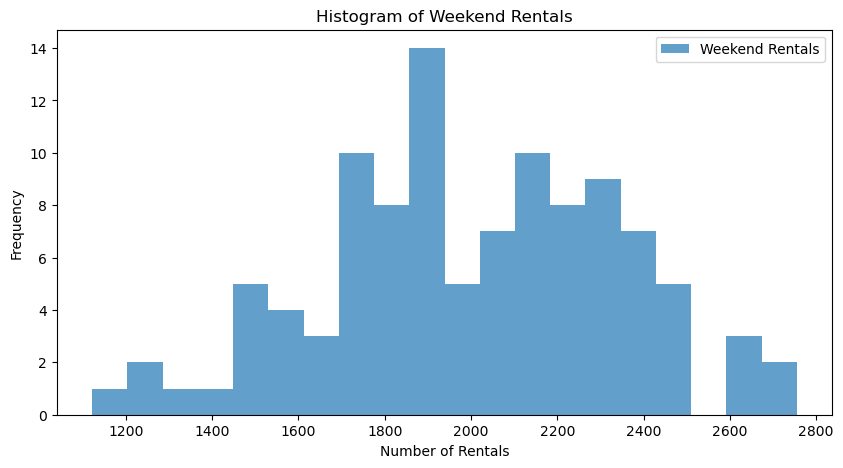

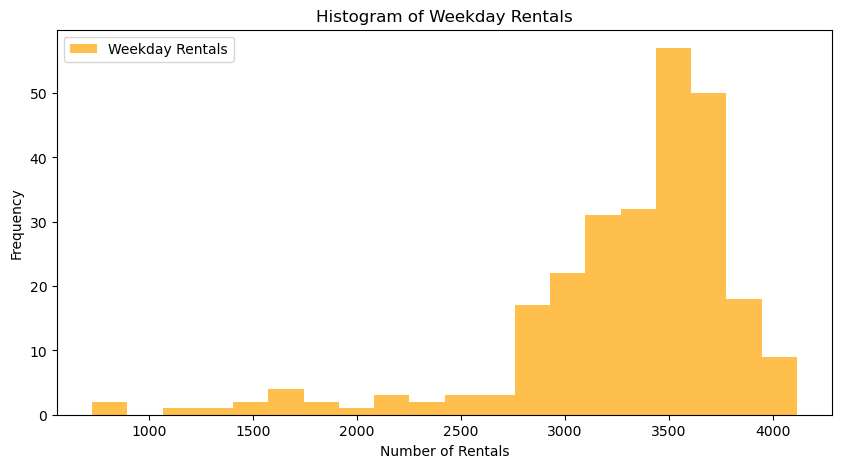

In [95]:
# Plot histogram for weekend rentals
plt.figure(figsize=(10, 5))
plt.hist(weekend_rentals, bins=20, alpha=0.7, label='Weekend Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.title('Histogram of Weekend Rentals')
plt.legend()
plt.show()

# Plot histogram for weekday rentals
plt.figure(figsize=(10, 5))
plt.hist(weekday_rentals, bins=20, alpha=0.7, color='orange', label='Weekday Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.title('Histogram of Weekday Rentals')
plt.legend()
plt.show()

In [96]:
#The Shapiro-Wilk test on the 'num_rentals' column
stat, p_value = shapiro(weekend_rentals)

# Display the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.9914825558662415
p-value: 0.7556470632553101
The data appears to be normally distributed (fail to reject H0).


In [97]:
#The Shapiro-Wilk test on the weekday 'num_rentals' column
stat, p_value = shapiro(weekday_rentals)

# Display the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.8159146308898926
p-value: 7.38692006995657e-17
The data does not appear to be normally distributed (reject H0).


# Section 1.3 Data exploration of Toronto data 

In [98]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224545 entries, 0 to 224544
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Trip Id             224545 non-null  int64  
 1   Trip  Duration      224545 non-null  int64  
 2   Start Station Id    224545 non-null  int64  
 3   Start Time          224545 non-null  object 
 4   Start Station Name  209099 non-null  object 
 5   End Station Id      224465 non-null  float64
 6   End Time            224545 non-null  object 
 7   End Station Name    208603 non-null  object 
 8   Bike Id             224545 non-null  int64  
 9   User Type           224545 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 17.1+ MB


In [99]:
dft = pd.read_csv("BikeshareTorontoMar2023.csv")

In [100]:
dft = dft.rename(columns={"Trip Id": "trip_id"})
dft = dft.rename(columns={"Trip  Duration": "trip_duration"})##easier to work with no spaces

In [101]:
print(dft.nunique())

trip_id               224545
trip_duration           4423
Start Station Id         659
Start Time             36511
Start Station Name       577
End Station Id           660
End Time               36517
End Station Name         578
Bike Id                 5793
User Type                  2
dtype: int64


In [102]:
dft.head()

,trip_id,trip_duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,20554549,467,7462,03/01/2023 00:01,Richmond St E / Yonge St,7246.0,03/01/2023 00:09,Yonge St / Bloor St,5163,Casual Member
1,20554551,1692,7020,03/01/2023 00:01,Phoebe St / Spadina Ave,7020.0,03/01/2023 00:29,Phoebe St / Spadina Ave,4887,Casual Member
2,20554554,516,7281,03/01/2023 00:03,Charles St W / Balmuto St - SMART,7004.0,03/01/2023 00:12,University Ave / Elm St,371,Casual Member
3,20554555,428,7502,03/01/2023 00:03,University Ave / College St (East),7599.0,03/01/2023 00:11,Richmond St W / York St,3749,Casual Member
4,20554556,423,7502,03/01/2023 00:03,University Ave / College St (East),7599.0,03/01/2023 00:10,Richmond St W / York St,5631,Annual Member


In [103]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224545 entries, 0 to 224544
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_id             224545 non-null  int64  
 1   trip_duration       224545 non-null  int64  
 2   Start Station Id    224545 non-null  int64  
 3   Start Time          224545 non-null  object 
 4   Start Station Name  209099 non-null  object 
 5   End Station Id      224465 non-null  float64
 6   End Time            224545 non-null  object 
 7   End Station Name    208603 non-null  object 
 8   Bike Id             224545 non-null  int64  
 9   User Type           224545 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 17.1+ MB


In [104]:
##Need to put the dates in the right format
dft['Start Time'] = pd.to_datetime(dft['Start Time'], format='%m/%d/%Y %H:%M')
dft['End Time'] = pd.to_datetime(dft['End Time'], format='%m/%d/%Y %H:%M')


In [105]:
#Have to use the dt date function so the data is represented daily for comparison to the dublin dataset
dft['onlyDate'] = dft['Start Time'].dt.date 

In [106]:
#Group by the date and count trips
dft_daily = dft.groupby('onlyDate').size().reset_index(name='num_rentals')

In [107]:
dft_daily.head

<bound method NDFrame.head of       onlyDate  num_rentals
0   2023-03-01         6889
1   2023-03-02         7966
2   2023-03-03         5751
3   2023-03-04         2999
4   2023-03-05         5456
5   2023-03-06         6818
6   2023-03-07         7392
7   2023-03-08         8017
8   2023-03-09         8466
9   2023-03-10         3228
10  2023-03-11         4919
11  2023-03-12         4660
12  2023-03-13         5086
13  2023-03-14         6461
14  2023-03-15         8143
15  2023-03-16         9185
16  2023-03-17         6419
17  2023-03-18         5965
18  2023-03-19         4751
19  2023-03-20         8365
20  2023-03-21        10724
21  2023-03-22         9805
22  2023-03-23         8286
23  2023-03-24        10096
24  2023-03-25         3711
25  2023-03-26        11397
26  2023-03-27         7699
27  2023-03-28        11312
28  2023-03-29         8895
29  2023-03-30         9955
30  2023-03-31         5729>

In [108]:
#dft_daily=dft_daily.reset_index()

In [109]:
dft_daily.shape

(31, 2)

In [110]:
dft_daily.head()

,onlyDate,num_rentals
0,2023-03-01,6889
1,2023-03-02,7966
2,2023-03-03,5751
3,2023-03-04,2999
4,2023-03-05,5456


<Axes: xlabel='num_rentals'>

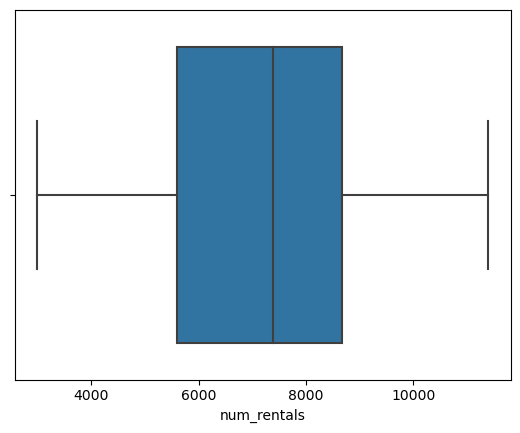

In [111]:
##lets see if the trip data is normal 
sns.boxplot(x=dft_daily["num_rentals"])

In [112]:
#The Shapiro-Wilk test on the 'num_rentals' column
stat, p_value = shapiro(dft_daily['num_rentals'])

# Display the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.9770971536636353
p-value: 0.7281067371368408
The data appears to be normally distributed (fail to reject H0).


# weather data

In [113]:
####weather data 
weather_data = pd.read_csv("dweather.csv")

In [114]:
weather_data.head()

,date,ind,maxtp,ind.1,mintp,igmin,ind.2,rain,cbl,wdsp,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-Jan-42,0,9.7,0,6.8,0,2,0.0,1020.3,17.2,...,,0.0,0,,,1.1,1.4,,,
1,02-Jan-42,0,9.9,0,7.9,0,0,0.1,1016.2,15.2,...,,0.0,0,,,0.7,0.9,,,
2,03-Jan-42,0,11.2,0,8.9,0,0,1.5,1006.8,14.0,...,,0.1,0,,,0.5,0.6,,,
3,04-Jan-42,0,9.2,0,2.7,0,0,3.5,1001.5,17.0,...,,0.6,0,,,0.6,0.7,,,
4,05-Jan-42,0,3.5,1,-0.8,0,0,0.6,1013.4,13.0,...,,3.4,0,,,0.6,0.7,,,


In [115]:
weather_data.tail()

,date,ind,maxtp,ind.1,mintp,igmin,ind.2,rain,cbl,wdsp,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
30097,27-May-24,0,16.7,0,8.6,0,0,0.5,1000.5,6.7,...,21,6.0,0,1824,14.1,2.8,3.9,32.3,32.3,33.5
30098,28-May-24,0,18.7,0,11.1,0,0,4.4,997.0,9.4,...,30,2.2,0,1432,15.15,2.6,3.7,29.8,29.8,31.1
30099,29-May-24,0,17.7,0,10.9,0,0,0.2,999.5,13.0,...,27,2.3,0,1490,14.75,2.8,4,31.6,31.6,33.1
30100,30-May-24,0,16.0,0,10.1,0,0,0.1,1007.7,14.9,...,30,3.0,0,1366,14,2.6,3.9,33.3,33.3,34.9
30101,31-May-24,0,18.9,0,7.7,0,0,0.0,1015.5,9.1,...,20,8.5,0,2392,16.275,3.6,5.2,35.8,35.8,37.7


In [116]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30102 entries, 0 to 30101
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    30102 non-null  object 
 1   ind     30102 non-null  int64  
 2   maxtp   30102 non-null  float64
 3   ind.1   30102 non-null  int64  
 4   mintp   30102 non-null  float64
 5   igmin   30102 non-null  int64  
 6   ind.2   30102 non-null  int64  
 7   rain    30102 non-null  float64
 8   cbl     30102 non-null  float64
 9   wdsp    30102 non-null  float64
 10  ind.3   30102 non-null  int64  
 11  hm      30102 non-null  object 
 12  ind.4   30102 non-null  int64  
 13  ddhm    30102 non-null  object 
 14  ind.5   30102 non-null  int64  
 15  hg      30102 non-null  object 
 16  sun     30102 non-null  float64
 17  dos     30102 non-null  object 
 18  g_rad   30102 non-null  object 
 19  soil    30102 non-null  object 
 20  pe      30102 non-null  float64
 21  evap    30102 non-null  object 
 22

In [117]:
weather_data['date'] = pd.to_datetime(weather_data['date'])  ##convert to date format 

C:\Users\T\AppData\Local\Temp\ipykernel_73316\1801666782.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_data['date'] = pd.to_datetime(weather_data['date'])  ##convert to date format


In [118]:
weather_data.info

<bound method DataFrame.info of             date  ind  maxtp  ind.1  mintp  igmin  ind.2  rain     cbl  wdsp  \
0     2042-01-01    0    9.7      0    6.8      0      2   0.0  1020.3  17.2   
1     2042-01-02    0    9.9      0    7.9      0      0   0.1  1016.2  15.2   
2     2042-01-03    0   11.2      0    8.9      0      0   1.5  1006.8  14.0   
3     2042-01-04    0    9.2      0    2.7      0      0   3.5  1001.5  17.0   
4     2042-01-05    0    3.5      1   -0.8      0      0   0.6  1013.4  13.0   
...          ...  ...    ...    ...    ...    ...    ...   ...     ...   ...   
30097 2024-05-27    0   16.7      0    8.6      0      0   0.5  1000.5   6.7   
30098 2024-05-28    0   18.7      0   11.1      0      0   4.4   997.0   9.4   
30099 2024-05-29    0   17.7      0   10.9      0      0   0.2   999.5  13.0   
30100 2024-05-30    0   16.0      0   10.1      0      0   0.1  1007.7  14.9   
30101 2024-05-31    0   18.9      0    7.7      0      0   0.0  1015.5   9.1   

       

In [119]:
weather_data.head()

,date,ind,maxtp,ind.1,mintp,igmin,ind.2,rain,cbl,wdsp,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,2042-01-01,0,9.7,0,6.8,0,2,0.0,1020.3,17.2,...,,0.0,0,,,1.1,1.4,,,
1,2042-01-02,0,9.9,0,7.9,0,0,0.1,1016.2,15.2,...,,0.0,0,,,0.7,0.9,,,
2,2042-01-03,0,11.2,0,8.9,0,0,1.5,1006.8,14.0,...,,0.1,0,,,0.5,0.6,,,
3,2042-01-04,0,9.2,0,2.7,0,0,3.5,1001.5,17.0,...,,0.6,0,,,0.6,0.7,,,
4,2042-01-05,0,3.5,1,-0.8,0,0,0.6,1013.4,13.0,...,,3.4,0,,,0.6,0.7,,,


In [120]:
weather_data.tail()

,date,ind,maxtp,ind.1,mintp,igmin,ind.2,rain,cbl,wdsp,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
30097,2024-05-27,0,16.7,0,8.6,0,0,0.5,1000.5,6.7,...,21,6.0,0,1824,14.1,2.8,3.9,32.3,32.3,33.5
30098,2024-05-28,0,18.7,0,11.1,0,0,4.4,997.0,9.4,...,30,2.2,0,1432,15.15,2.6,3.7,29.8,29.8,31.1
30099,2024-05-29,0,17.7,0,10.9,0,0,0.2,999.5,13.0,...,27,2.3,0,1490,14.75,2.8,4,31.6,31.6,33.1
30100,2024-05-30,0,16.0,0,10.1,0,0,0.1,1007.7,14.9,...,30,3.0,0,1366,14,2.6,3.9,33.3,33.3,34.9
30101,2024-05-31,0,18.9,0,7.7,0,0,0.0,1015.5,9.1,...,20,8.5,0,2392,16.275,3.6,5.2,35.8,35.8,37.7


In [121]:
start_date =('2023-01-01') 
end_date =('2023-12-31')    


In [122]:
##will filter for the weather in the same range as the dublin bikes dataset
weather_df = weather_data[(weather_data['date'] >= start_date) & (weather_data['date'] < end_date)]

In [123]:
weather_df.shape

(364, 25)

In [124]:
weather_df.nunique()

date      364
ind         1
maxtp     164
ind.1       2
mintp     155
igmin       2
ind.2       3
rain       95
cbl       256
wdsp      118
ind.3       1
hm         28
ind.4       1
ddhm       36
ind.5       1
hg         39
sun       106
dos         2
g_rad     341
soil      293
pe         43
evap       62
smd_wd    161
smd_md    207
smd_pd    188
dtype: int64

In [125]:
weather_df = weather_df.drop(["soil", "g_rad","pe","evap","smd_wd","smd_md","smd_pd","ind" ], axis=1)  ##drop 

In [126]:
weather_df.head()

,date,maxtp,ind.1,mintp,igmin,ind.2,rain,cbl,wdsp,ind.3,hm,ind.4,ddhm,ind.5,hg,sun,dos
29585,2023-01-01,6.8,0,1.3,1,0,1.1,991.5,5.5,0,11,0,280,0,18,0.2,0
29586,2023-01-02,6.1,0,0.4,1,3,0.0,1002.6,6.2,0,14,0,160,0,20,6.8,0
29587,2023-01-03,13.3,0,5.6,1,0,1.5,996.3,12.5,0,19,0,240,0,35,0.0,0
29588,2023-01-04,12.6,0,8.8,0,0,0.1,998.7,13.7,0,21,0,260,0,34,0.5,0
29589,2023-01-05,12.6,0,6.7,0,0,2.7,1000.5,10.3,0,19,0,190,0,29,0.0,0


In [127]:
final_df = pd.merge(df_dailyt, weather_df, on='date', how ='inner') ###needs to be wrapped in a list to make the join work

In [128]:
final_df.tail()

,date,num_rentals,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day,is_weekend,...,cbl,wdsp,ind.3,hm,ind.4,ddhm,ind.5,hg,sun,dos
359,2023-12-26,846.0,2023,6,Sunday,1,January,1,1,False,...,1000.9,9.0,0,21,0,290,0,29,0.6,0
360,2023-12-27,1126.0,2023,6,Sunday,1,January,1,1,False,...,986.2,14.0,0,22,0,210,0,38,0.9,0
361,2023-12-28,1281.0,2023,6,Sunday,1,January,1,1,False,...,982.1,13.9,0,19,0,210,0,33,2.0,0
362,2023-12-29,1672.0,2023,6,Sunday,1,January,1,1,False,...,992.0,11.4,0,17,0,240,0,30,3.5,0
363,2023-12-30,1465.0,2023,6,Sunday,1,January,1,1,True,...,982.9,10.3,0,18,0,200,0,31,0.1,0


In [129]:
final_df.shape  

(364, 27)

In [130]:
final_df.head()

,date,num_rentals,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day,is_weekend,...,cbl,wdsp,ind.3,hm,ind.4,ddhm,ind.5,hg,sun,dos
0,2023-01-01,1122.0,2022,5,Saturday,12,December,31,23,True,...,991.5,5.5,0,11,0,280,0,18,0.2,0
1,2023-01-02,1413.0,2022,5,Saturday,12,December,31,23,False,...,1002.6,6.2,0,14,0,160,0,20,6.8,0
2,2023-01-03,2555.0,2022,5,Saturday,12,December,31,23,False,...,996.3,12.5,0,19,0,240,0,35,0.0,0
3,2023-01-04,2757.0,2022,5,Saturday,12,December,31,23,False,...,998.7,13.7,0,21,0,260,0,34,0.5,0
4,2023-01-05,2811.0,2022,5,Saturday,12,December,31,23,False,...,1000.5,10.3,0,19,0,190,0,29,0.0,0


In [131]:
##quick check that anomolies weren't introduced as a result of the merge
final_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              364 non-null    datetime64[ns]
 1   num_rentals       364 non-null    float64       
 2   year              364 non-null    int32         
 3   day_of_week       364 non-null    int32         
 4   day_of_week_name  364 non-null    object        
 5   month             364 non-null    int32         
 6   month_name        364 non-null    object        
 7   day_of_month      364 non-null    int32         
 8   hour_of_day       364 non-null    int32         
 9   is_weekend        364 non-null    bool          
 10  is_weekday        364 non-null    bool          
 11  maxtp             364 non-null    float64       
 12  ind.1             364 non-null    int64         
 13  mintp             364 non-null    float64       
 14  igmin             364 non-

In [132]:
file_path = "C:\\Users\\T\\Documents\MSC semester 2\\Big project 1\\final_df.csv"  # Specify the file name or path
final_df.to_csv(file_path, index=False)  # Set index=False to exclude the DataFrame index

# Section 2 Statistics

# Section2 .1Descriptive statistics 

#going to do some descriptive statistics on the Final df

In [133]:
#good to see the spread of data for each column.
#It will let me know if I need to scale data before using machine learning models
final_df.describe()  

,date,num_rentals,year,day_of_week,month,day_of_month,hour_of_day,maxtp,ind.1,mintp,igmin,ind.2,rain,cbl,wdsp,ind.3,ind.4,ind.5,sun
count,364,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.0,364.0,364.0,364.000000
mean,2023-07-01 12:00:00,2929.670330,2022.692308,5.692308,4.384615,10.230769,7.148352,14.219780,0.071429,6.993681,0.156593,0.695055,2.745604,1001.799451,8.969780,0.0,0.0,0.0,4.022802
min,2023-01-01 00:00:00,727.000000,2022.000000,5.000000,1.000000,1.000000,0.000000,2.000000,0.000000,-4.800000,0.000000,0.000000,0.000000,961.700000,3.300000,0.0,0.0,0.0,0.000000
25%,2023-04-01 18:00:00,2233.000000,2022.000000,5.000000,1.000000,1.000000,0.000000,10.800000,0.000000,3.875000,0.000000,0.000000,0.000000,993.625000,6.600000,0.0,0.0,0.0,0.800000
50%,2023-07-01 12:00:00,3199.000000,2023.000000,6.000000,1.000000,1.000000,0.000000,13.750000,0.000000,7.200000,0.000000,0.000000,0.400000,1002.750000,8.500000,0.0,0.0,0.0,3.450000
75%,2023-09-30 06:00:00,3565.250000,2023.000000,6.000000,12.000000,31.000000,23.000000,18.125000,0.000000,10.200000,0.000000,2.000000,2.725000,1010.825000,10.800000,0.0,0.0,0.0,6.325000
max,2023-12-30 00:00:00,4115.000000,2023.000000,6.000000,12.000000,31.000000,23.000000,26.100000,1.000000,17.400000,1.000000,3.000000,48.600000,1034.100000,23.800000,0.0,0.0,0.0,15.500000
std,NaN,767.680576,0.462174,0.462174,5.083911,13.865213,10.585346,4.835486,0.257894,4.412284,0.363917,1.174982,5.372946,13.107756,3.158219,0.0,0.0,0.0,3.613832


# Section 2.2 Inferential Statistics

# Poisson Distribution 

In [134]:
from scipy.stats import poisson

In [135]:
df.describe()

,station_id,last_reported,BIKE_STANDS,AVAILABLE_BIKE_STANDS,num_bikes_available,LATITUDE,LONGITUDE,num_bikes_change,num_rentals,year,day_of_week,month,day_of_month,hour_of_day
count,1.994400e+06,1994400,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06
mean,5.923502e+01,2023-07-02 14:32:12.176168448,3.195552e+01,1.999530e+01,1.170346e+01,5.334557e+01,-6.264337e+00,6.518251e-06,5.353089e-01,2.023000e+03,3.006633e+00,6.529513e+00,1.573217e+01,1.151983e+01
min,1.000000e+00,2022-12-31 23:49:51,1.000000e+00,0.000000e+00,0.000000e+00,5.333010e+01,-6.310020e+00,-3.400000e+01,0.000000e+00,2.022000e+03,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.900000e+01,2023-04-02 09:26:09.249999872,2.900000e+01,1.200000e+01,3.000000e+00,5.333980e+01,-6.275230e+00,0.000000e+00,0.000000e+00,2.023000e+03,1.000000e+00,4.000000e+00,8.000000e+00,6.000000e+00
50%,5.800000e+01,2023-07-02 15:55:53,3.000000e+01,2.000000e+01,1.000000e+01,5.334520e+01,-6.262980e+00,0.000000e+00,0.000000e+00,2.023000e+03,3.000000e+00,7.000000e+00,1.600000e+01,1.200000e+01
75%,8.900000e+01,2023-10-01 20:25:48.249999872,4.000000e+01,2.900000e+01,1.800000e+01,5.335090e+01,-6.251560e+00,0.000000e+00,0.000000e+00,2.023000e+03,5.000000e+00,1.000000e+01,2.300000e+01,1.800000e+01
max,5.070000e+02,2023-12-31 23:29:49,4.000000e+01,4.000000e+01,4.000000e+01,5.336000e+01,-6.230850e+00,3.700000e+01,3.400000e+01,2.023000e+03,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01
std,3.683781e+01,NaN,7.520394e+00,1.109453e+01,9.797045e+00,7.579184e-03,1.791292e-02,2.239962e+00,1.489831e+00,7.526982e-03,2.003669e+00,3.447039e+00,8.790739e+00,6.920123e+00


In [136]:
##whats the probability of getting an available bike in dublin any day

poisson.sf(k = 1, mu = 1.170346e+01)


0.9998950037163976

In [137]:
dft.describe()

,trip_id,trip_duration,Start Station Id,Start Time,End Station Id,End Time,Bike Id
count,2.245450e+05,2.245450e+05,224545.000000,224545,224465.000000,224545,224545.000000
mean,2.068175e+07,8.629334e+02,7278.328455,2023-03-17 21:15:04.713798912,7274.771555,2023-03-17 21:29:28.012914944,3787.042726
min,2.055455e+07,0.000000e+00,7000.000000,2023-03-01 00:01:00,7000.000000,2023-03-01 00:09:00,14.000000
25%,2.061800e+07,3.840000e+02,7079.000000,2023-03-09 16:52:00,7077.000000,2023-03-09 17:06:00,2039.000000
50%,2.068176e+07,6.180000e+02,7250.000000,2023-03-18 17:58:00,7248.000000,2023-03-18 18:14:00,3830.000000
75%,2.074550e+07,1.008000e+03,7422.000000,2023-03-25 19:10:00,7419.000000,2023-03-25 19:26:00,5583.000000
max,2.080958e+07,1.206761e+06,7772.000000,2023-03-31 23:59:00,7772.000000,2023-04-11 15:35:00,7262.000000
std,7.352713e+04,5.184945e+03,213.697209,NaN,215.047573,NaN,2098.250227


# T Test 

In [138]:
###I will attempt to determin if the mean trip duration is the same for weekdays and weekends


In [139]:
###extracting weekend columns to analyse
dft['day_of_week_name'] = dft['Start Time'].dt.day_name()
dft['month_name'] = dft['Start Time'].dt.month_name()
dft['is_weekend'] = dft['Start Time'].dt.day_name().isin(['Saturday', 'Sunday'])
dft.head()

,trip_id,trip_duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,onlyDate,day_of_week_name,month_name,is_weekend
0,20554549,467,7462,2023-03-01 00:01:00,Richmond St E / Yonge St,7246.0,2023-03-01 00:09:00,Yonge St / Bloor St,5163,Casual Member,2023-03-01,Wednesday,March,False
1,20554551,1692,7020,2023-03-01 00:01:00,Phoebe St / Spadina Ave,7020.0,2023-03-01 00:29:00,Phoebe St / Spadina Ave,4887,Casual Member,2023-03-01,Wednesday,March,False
2,20554554,516,7281,2023-03-01 00:03:00,Charles St W / Balmuto St - SMART,7004.0,2023-03-01 00:12:00,University Ave / Elm St,371,Casual Member,2023-03-01,Wednesday,March,False
3,20554555,428,7502,2023-03-01 00:03:00,University Ave / College St (East),7599.0,2023-03-01 00:11:00,Richmond St W / York St,3749,Casual Member,2023-03-01,Wednesday,March,False
4,20554556,423,7502,2023-03-01 00:03:00,University Ave / College St (East),7599.0,2023-03-01 00:10:00,Richmond St W / York St,5631,Annual Member,2023-03-01,Wednesday,March,False


In [140]:
dft = dft.rename(columns={"trip_duration": "trip"})

In [141]:
##will extract weekday from the dataset and trip duration
weekday_trips = dft[dft['is_weekend'] == False]['trip']

###selecting for trip duration 
weekend_trips = dft[dft['is_weekend'] == True]['trip']

###t - test
t_stat, p_value = stats.ttest_ind(weekday_trips, weekend_trips, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -5.47138980663357
P-value: 4.48715553242963e-08


# Attempting to find similarities between other countries and Ireland.


# T test independent 

In [142]:
##comparing the number of rentals between Dublin city and Toronto city

##t-test are robust to non normality datasets if it is large enough 
t_stat, p_value = ttest_ind(df_daily['num_rentals'], dft_daily['num_rentals'])
print(f"T-statistic: {t_stat}, p-value: {p_value}")

###low p value meaning

T-statistic: -23.386165786832983, p-value: 1.518603292337118e-76


# Kruskal Wallis test 

In [143]:
#Step 1: Hypothesis

#H0: there is no difference in the level of rentals between the three cities
#H1: there is at least one city that presents a different level of rentals

#Step 2: we create the variables

D = df_daily['num_rentals']
T = dft_daily['num_rentals']
L = dfla_daily['num_rentals']

In [144]:
from scipy.stats import kruskal

In [145]:
## comparing different p values with alpha
stat, p = kruskal(D, T, L)

print('Statistical Test:', stat)
print("p-value:", p)

Statistical Test: 246.9379113735611
p-value: 2.3884373768589831e-54


# U-Mann Whitman Test 

In [146]:
#Step 1: Hypothesis
#H0: there is no difference in the level of rentals between the three cities
#H1: there is at least one city that presents a different level of rentals

#Step 2: Creating the variables (we already created this before)

#Step 3: Test

In [147]:
from scipy.stats import mannwhitneyu


In [148]:
stat, p = mannwhitneyu(D, T)
print('Statistical Test:', stat)
print("p-value:", p)

Statistical Test: 422.0
p-value: 1.1373239538895792e-17


# spearman correlation 

In [149]:
from scipy.stats import spearmanr

In [150]:
DS =D.head(31)  ##DS for D sample

In [151]:
spearman_corr, p_value = spearmanr(DS, T)

print(f"Spearman Correlation: {spearman_corr}")
print(f"P-value: {p_value}")

Spearman Correlation: -0.08911290322580646
P-value: 0.6335610242106571


# Section 3 Machine learning 

In [152]:
df.describe() ##checking the distribution of values 

,station_id,last_reported,BIKE_STANDS,AVAILABLE_BIKE_STANDS,num_bikes_available,LATITUDE,LONGITUDE,num_bikes_change,num_rentals,year,day_of_week,month,day_of_month,hour_of_day
count,1.994400e+06,1994400,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06,1.994400e+06
mean,5.923502e+01,2023-07-02 14:32:12.176168448,3.195552e+01,1.999530e+01,1.170346e+01,5.334557e+01,-6.264337e+00,6.518251e-06,5.353089e-01,2.023000e+03,3.006633e+00,6.529513e+00,1.573217e+01,1.151983e+01
min,1.000000e+00,2022-12-31 23:49:51,1.000000e+00,0.000000e+00,0.000000e+00,5.333010e+01,-6.310020e+00,-3.400000e+01,0.000000e+00,2.022000e+03,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.900000e+01,2023-04-02 09:26:09.249999872,2.900000e+01,1.200000e+01,3.000000e+00,5.333980e+01,-6.275230e+00,0.000000e+00,0.000000e+00,2.023000e+03,1.000000e+00,4.000000e+00,8.000000e+00,6.000000e+00
50%,5.800000e+01,2023-07-02 15:55:53,3.000000e+01,2.000000e+01,1.000000e+01,5.334520e+01,-6.262980e+00,0.000000e+00,0.000000e+00,2.023000e+03,3.000000e+00,7.000000e+00,1.600000e+01,1.200000e+01
75%,8.900000e+01,2023-10-01 20:25:48.249999872,4.000000e+01,2.900000e+01,1.800000e+01,5.335090e+01,-6.251560e+00,0.000000e+00,0.000000e+00,2.023000e+03,5.000000e+00,1.000000e+01,2.300000e+01,1.800000e+01
max,5.070000e+02,2023-12-31 23:29:49,4.000000e+01,4.000000e+01,4.000000e+01,5.336000e+01,-6.230850e+00,3.700000e+01,3.400000e+01,2.023000e+03,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01
std,3.683781e+01,NaN,7.520394e+00,1.109453e+01,9.797045e+00,7.579184e-03,1.791292e-02,2.239962e+00,1.489831e+00,7.526982e-03,2.003669e+00,3.447039e+00,8.790739e+00,6.920123e+00


In [153]:
final_df.head()

,date,num_rentals,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day,is_weekend,...,cbl,wdsp,ind.3,hm,ind.4,ddhm,ind.5,hg,sun,dos
0,2023-01-01,1122.0,2022,5,Saturday,12,December,31,23,True,...,991.5,5.5,0,11,0,280,0,18,0.2,0
1,2023-01-02,1413.0,2022,5,Saturday,12,December,31,23,False,...,1002.6,6.2,0,14,0,160,0,20,6.8,0
2,2023-01-03,2555.0,2022,5,Saturday,12,December,31,23,False,...,996.3,12.5,0,19,0,240,0,35,0.0,0
3,2023-01-04,2757.0,2022,5,Saturday,12,December,31,23,False,...,998.7,13.7,0,21,0,260,0,34,0.5,0
4,2023-01-05,2811.0,2022,5,Saturday,12,December,31,23,False,...,1000.5,10.3,0,19,0,190,0,29,0.0,0


In [173]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--","NaN"]
final_df = pd.read_csv("final_df.csv", na_values = missing_value_formats)

In [155]:
##ran into issues with values so I will attempt to remove any nulls from weather data
print(final_df.isnull().sum())




date                0
num_rentals         0
year                0
day_of_week         0
day_of_week_name    0
month               0
month_name          0
day_of_month        0
hour_of_day         0
is_weekend          0
is_weekday          0
maxtp               0
ind.1               0
mintp               0
igmin               0
ind.2               0
rain                0
cbl                 0
wdsp                0
ind.3               0
hm                  0
ind.4               0
ddhm                0
ind.5               0
hg                  0
sun                 0
dos                 0
dtype: int64


In [170]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              364 non-null    object 
 1   num_rentals       364 non-null    float64
 2   year              364 non-null    int64  
 3   day_of_week       364 non-null    int64  
 4   day_of_week_name  364 non-null    object 
 5   month             364 non-null    int64  
 6   month_name        364 non-null    object 
 7   day_of_month      364 non-null    int64  
 8   hour_of_day       364 non-null    int64  
 9   is_weekend        364 non-null    bool   
 10  is_weekday        364 non-null    bool   
 11  maxtp             364 non-null    float64
 12  ind.1             364 non-null    int64  
 13  mintp             364 non-null    float64
 14  igmin             364 non-null    int64  
 15  ind.2             364 non-null    int64  
 16  rain              364 non-null    float64
 1

In [157]:
#pip install xgboost

In [158]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder##to make categorical variables available for ML models
import random##required for random.seed which allows the same randomisation 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt


In [190]:


# Define the features (X) and target (y)
X = final_df[['year', 'day_of_week', 'month', 'day_of_month',
                       'hour_of_day','is_weekend','is_weekday',
                        'maxtp',
                       'mintp','rain','cbl','wdsp','hm','ddhm','hg','sun','dos']]  # Drop non-numeric and target columns
y = final_df['num_rentals']



In [191]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
# Hyperparameter grids
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2', None]
}


xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [193]:
# Random Forest model with GridSearchCV
rf_model = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_model.fit(X_train, y_train)

# XGBoost model with GridSearchCV
xgb_model = GridSearchCV(xgb.XGBRegressor(random_state=42, objective='reg:squarederror'), param_grid=xgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_model.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [194]:
# Evaluate the best models
rf_best = rf_model.best_estimator_
xgb_best = xgb_model.best_estimator_


In [195]:
#best models are useed to make predictions
# Predictions
rf_predictions = rf_best.predict(X_test)
xgb_predictions = xgb_best.predict(X_test)


In [196]:
# Metrics of predictions
#MSE represents the difference between the predicted and the actual value.
#A low MSE represents good predictions
#R2 represents the amount of varience explained by the predictor variables.
#A high R2 value means the predictors are efficient predictors of thr variables.

#Random Forest metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

#XGBoost metrics 
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)



In [197]:
# Display results
print("Random Forest Results:")
print(f"Best Parameters: {rf_model.best_params_}")
print(f"MSE: {rf_mse}")
print(f"R^2: {rf_r2}")

print("\nXGBoost Results:")
print(f"Best Parameters: {xgb_model.best_params_}")
print(f"MSE: {xgb_mse}")
print(f"R^2: {xgb_r2}")


Random Forest Results:
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
MSE: 234472.34495026633
R^2: 0.6387480783093904

XGBoost Results:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
MSE: 265578.4407149584
R^2: 0.5908228661754364


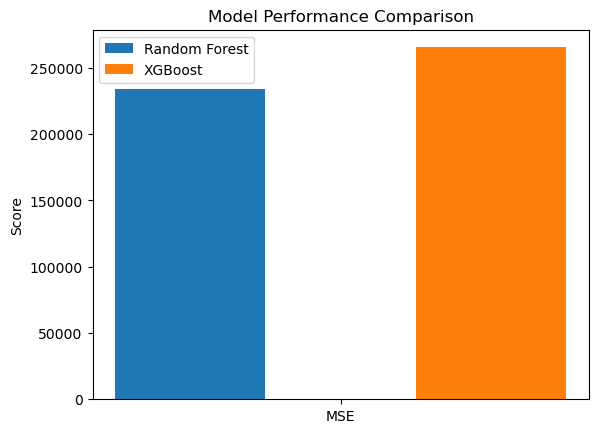

In [202]:
import matplotlib.pyplot as plt

metrics = ['MSE']
rf_values = [rf_mse]
xgb_values = [xgb_mse]

x = range(len(metrics))

plt.bar(x, rf_values, width=0.2, label='Random Forest', align='center')
plt.bar([p + 0.4 for p in x], xgb_values, width=0.2, label='XGBoost', align='center')

plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()


# Section 3.1 Unsupervised Machine Learning

In [221]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [222]:
# Select numeric columns for clustering
columns_for_clustering = ['hour_of_day', 'num_rentals', 'maxtp', 'mintp', 'rain', 'cbl', 'wdsp', 'hm', 'ddhm', 'hg', 'sun']
df_clustering = final_df[columns_for_clustering]


In [223]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

In [224]:
# Elbow Method to find optimal number of clusters
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Testing cluster numbers from 2 to 10

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))  # Silhouette Score


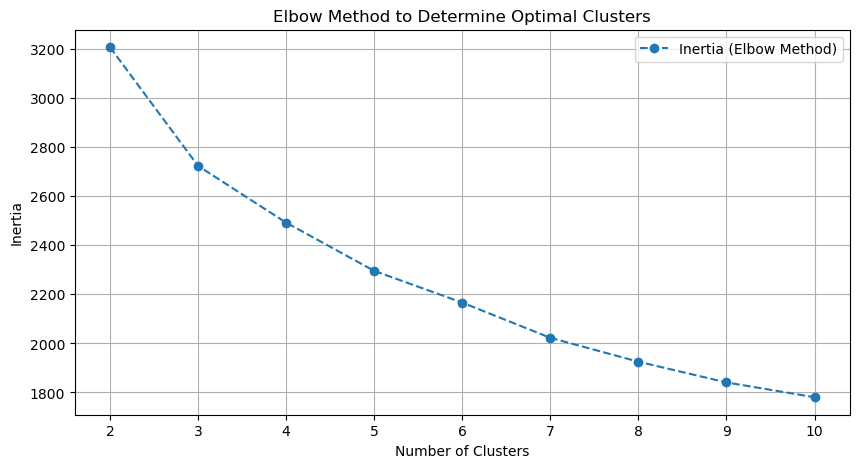

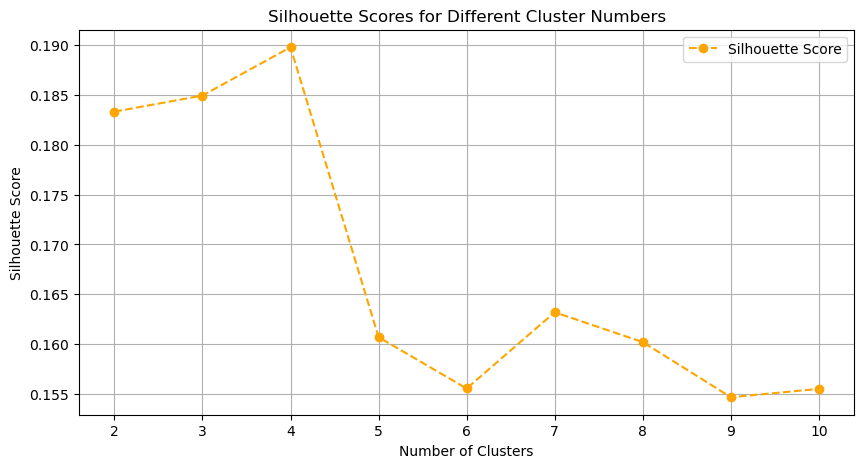

In [225]:
# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', label='Inertia (Elbow Method)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.grid(True)
plt.legend()
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='orange', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Cluster Numbers')
plt.grid(True)
plt.legend()
plt.show()

In [226]:
# Apply K-Means with the optimal number of clusters 
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

In [227]:
# Add cluster labels to the dataset
final_df['cluster'] = clusters


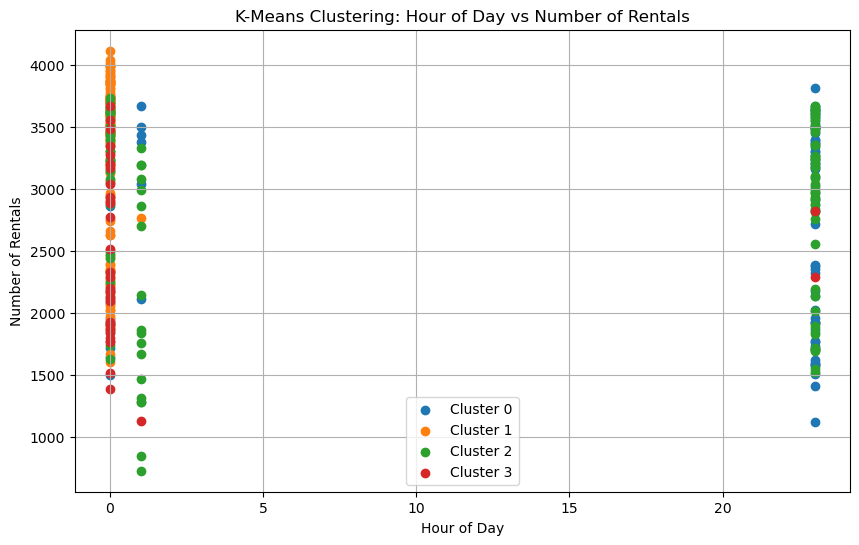

In [229]:
# Visualization: Scatter plot of hour_of_day vs num_rentals colored by clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = final_df[final_df['cluster'] == cluster]
    plt.scatter(cluster_data['hour_of_day'], cluster_data['num_rentals'], label=f'Cluster {cluster}')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Rentals')
plt.title('K-Means Clustering: Hour of Day vs Number of Rentals')
plt.legend()
plt.grid(True)
plt.show()

# Sentimental analysis dublin

In [230]:
from requests.auth import HTTPBasicAuth
import json
import yaml

In [ ]:
#pip install praw nltk vaderSentiment

In [231]:
#An inuitive way to interact with Reddits API
import praw

In [232]:
# Initialize the Reddit API client
reddit = praw.Reddit(client_id='wLtMrxRbFQ8zRuyduBEppA',
                     client_secret='S_5XHK9uscspDlR8SUNcF2bjM4TP8A',
                     user_agent='Dublin')

# Function to extract comments from a specific subreddit
def extract_comments(subreddit_name, search_query, limit=100):
    subreddit = reddit.subreddit(subreddit_name)
    comments_data = []

    for submission in subreddit.search(search_query, limit=limit):
        submission.comments.replace_more(limit=0)
        for comment in submission.comments.list():
            comments_data.append(comment.body)

    return comments_data

# Extract comments related to Dublin cycling reviews
comments = extract_comments('dublin', 'cycling', limit=100)
dfreview = pd.DataFrame(comments, columns=['comment'])

Version 7.7.1 of praw is outdated. Version 7.8.1 was released Friday October 25, 2024.


In [233]:
dfreview.tail()

,comment
4002,"I'm not a bikist so, one last stupid question...."
4003,You might wanna send that direct to op so they...
4004,I have a hybrid because drop handlebars aren't...
4005,"Really? Fair enough then, good input for OP.\n..."
4006,It's personal preference I suppose. I used to ...


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(comment):
    sentiment = analyzer.polarity_scores(comment)
    return sentiment

# Apply sentiment analysis to each comment
dfreview['sentiment'] = dfreview['comment'].apply(analyze_sentiment)

# Extract compound sentiment score for simplicity
dfreview['compound'] = dfreview['sentiment'].apply(lambda x: x['compound'])

# Classify sentiment as positive, negative, or neutral
dfreview['sentiment_label'] = dfreview['compound'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Display the dataframe with sentiment labels
print(dfreview.head())

In [ ]:
dfreview.head()

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='sentiment_label',data=dfreview, palette='YlGnBu_r')

# Toronto sentiment 

In [ ]:
# Initialize the Reddit API client
reddittoronto = praw.Reddit(client_id='wLtMrxRbFQ8zRuyduBEppA',
                     client_secret='S_5XHK9uscspDlR8SUNcF2bjM4TP8A',
                     user_agent='Dublin')

# Function to extract comments from a specific subreddit
def extract_comments(torontobiking, search_query, limit=100):
    subreddit = reddit.subreddit(torontobiking)
    comments_data = []

    for submission in subreddit.search(search_query, limit=limit):
        submission.comments.replace_more(limit=0)
        for comment in submission.comments.list():
            comments_data.append(comment.body)

    return comments_data

# Extract comments related to Toronto cycling reviews
comments = extract_comments('toronto', 'biking', limit=100)
dftreview = pd.DataFrame(comments, columns=['comment'])

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='sentiment_label',data=dftreview, palette='YlGnBu_r')

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(comment):
    sentiment = analyzer.polarity_scores(comment)
    return sentiment

# Apply sentiment analysis to each comment
dftreview['sentiment'] = dftreview['comment'].apply(analyze_sentiment)

# Extract compound sentiment score for simplicity
dftreview['compound'] = dftreview['sentiment'].apply(lambda x: x['compound'])

# Classify sentiment as positive, negative, or neutral
dftreview['sentiment_label'] = dftreview['compound'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Display the dataframe with sentiment labels
print(dftreview.head())

# La Biking

In [ ]:
# Initialize the Reddit API client
redditla = praw.Reddit(client_id='wLtMrxRbFQ8zRuyduBEppA',
                     client_secret='S_5XHK9uscspDlR8SUNcF2bjM4TP8A',
                     user_agent='Dublin')

# Function to extract comments from a specific subreddit
def extract_comments(LAMetro, Bikeshare, limit=100):
    subreddit = reddit.subreddit(LAMetro)
    comments_data = []

    for submission in subreddit.search(Bikeshare, limit=limit):
        submission.comments.replace_more(limit=0)
        for comment in submission.comments.list():
            comments_data.append(comment.body)

    return comments_data

# Extract comments related to Dublin cycling reviews
comments = extract_comments('cycling', 'Bikeshare', limit=100)
dflareview = pd.DataFrame(comments, columns=['comment'])

In [ ]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(comment):
    sentiment = analyzer.polarity_scores(comment)
    return sentiment

# Apply sentiment analysis to each comment
dflareview['sentiment'] = dflareview['comment'].apply(analyze_sentiment)

# Extract compound sentiment score for simplicity
dflareview['compound'] = dflareview['sentiment'].apply(lambda x: x['compound'])

# Classify sentiment as positive, negative, or neutral
dflareview['sentiment_label'] = dflareview['compound'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Display the dataframe with sentiment labels
print(dflareview.head())

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='sentiment_label',data=dflareview, palette='YlGnBu_r')

In [ ]:
#pip install dash-bootstrap-components

In [ ]:
df.info()

# I'm going to remove everything below this #####

# Hypothesis testing 

# ttest

In [ ]:
import scipy.stats as stats
from scipy.stats import shapiro

In [234]:
df_daily.describe()

,num_rentals
count,366.000000
mean,2916.994536
std,785.790209
min,0.000000
25%,2227.750000
50%,3193.500000
75%,3561.750000
max,4115.000000


In [ ]:
dft_daily = dft_daily.rename(columns={"trip_id": "num_rentals"})
dfla_daily = dfla_daily.rename(columns={"trip_id": "num_rentals"})


In [235]:
X1 = df_daily['num_rentals']
X2 = dfla_daily['num_rentals']

<Axes: >

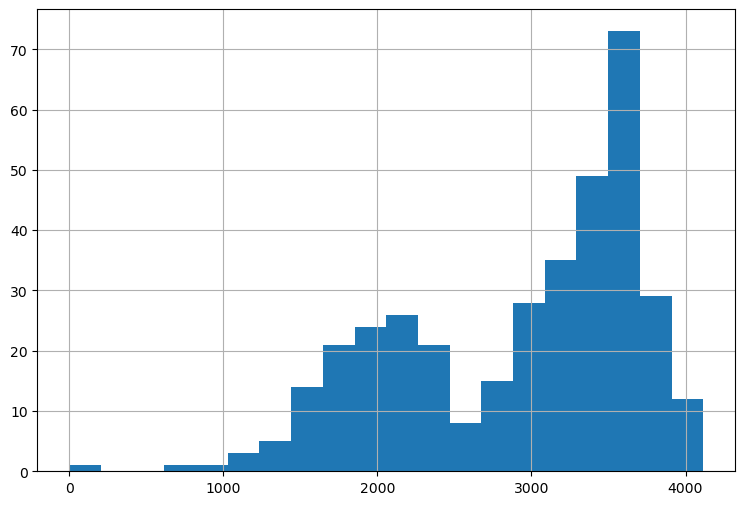

In [236]:
X1.hist(figsize=(9,6),   # Plot size
                   bins=20)  

<Axes: >

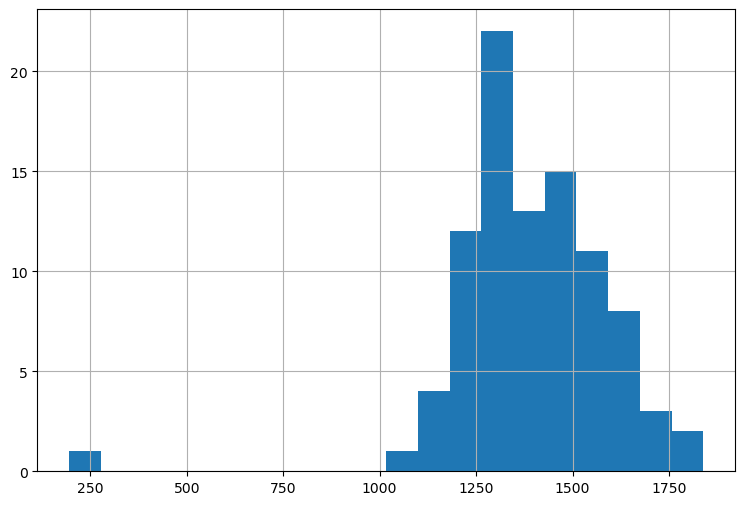

In [237]:
X2.hist(figsize=(9,6),   # Plot size
                   bins=20)

In [238]:
stat, p_value = shapiro(X1)

In [239]:
stat, p_value 

(0.913783073425293, 1.2744719288162315e-13)

In [240]:
stat, p_value = shapiro(X2)

In [241]:
stat, p_value

(0.8434810042381287, 1.924781578566126e-08)

In [ ]:
df_daily.head()

In [242]:
X1 = df_daily['num_rentals']
X2 = dfla_daily['num_rentals']

In [243]:
shapiro(X1)

ShapiroResult(statistic=0.913783073425293, pvalue=1.2744719288162315e-13)

In [244]:
shapiro(X2)

ShapiroResult(statistic=0.8434810042381287, pvalue=1.924781578566126e-08)

In [ ]:
#is the difference in number of rentals statisticaly significant 

t_test = stats.ttest_ind(X1, X2, equal_var = False)
display(t_test)

# Feature extraction to get normal columns for parametric tests


In [ ]:
##I tried to extract the average distance from the center point of each area but this did not give normal data for parametric test 

#I'm going to get the log of the number of rentals 

In [ ]:
#pip install geopy

In [ ]:
from geopy.distance import geodesic

In [ ]:
grouped_station_dublin['distance_to_center'] = df.apply(
    lambda row: geodesic((row['LATITUDE'], row['LONGITUDE']), city_center).km, axis=1)

In [ ]:
#Group by unique station name 
grouped_station_dublin = df.groupby('NAME').agg({'distance_to_center':'max'})

In [ ]:
##Bring distance to center back as a column not an index
grouped_station_dublin.reset_index()

In [ ]:
grouped_station_dublin.head(100)

In [ ]:
##country coordinate website says the below is considered the center of the city
city_center = (53.3498, -6.2603)  


In [ ]:
grouped_station.head()

In [ ]:
##LA feature extraction 
dfla.head()

In [ ]:
##so I can group by start station
grouped_stations_LA = dfla.drop_duplicates(subset='start_station', keep='first')


In [ ]:
city_center_la = (34.0522,118.2437)

In [ ]:
grouped_stations_LA['distance_to_center'] = grouped_stations_LA.apply(
    lambda row: geodesic((row['start_lat'], row['start_lon']), city_center_la).km, axis=1)

In [ ]:
grouped_stations_LA.head()

In [ ]:
###I have my data but its time to check if its normal for my parametric tests
sampled_la =grouped_stations_LA.sample(n=115, random_state=42)  # Randomly samples 100 rows




In [ ]:
 #Perform Shapiro-Wilk test on distance to center
stat, p_value = shapiro(sampled_la['distance_to_center'])

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")


if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

In [ ]:
#Perform Shapiro-Wilk test on distance to center
stat, p_value = shapiro(grouped_station_dublin['distance_to_center'])


print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")


if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

# Leavene's test non parametric 

In [ ]:
D=grouped_station_dublin['distance_to_center']
L=sampled_la['distance_to_center']

In [ ]:
from scipy.stats import levene

In [ ]:
# Perform Levene's Test
stat, p_value = levene(D, L)

# Print results
print(f"Levene’s Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value > 0.05:
    print("Variances are likely equal.")
else:
    print("Variances are likely not equal.")


# Kruskal test  #non parametric test

In [ ]:
##lets see what we get for the non-parametric test -- if there is a different outcome we can confirm that the data used isn't normal

#Step 1: Hypothesis

#H0: there is no difference in the level of rentals between the three cities(Dublin, Toronto, LA)
#H1: there is at least one city that presents a different level of rentals

#Step 2: we create the variables

R = df_daily['num_rentals']
A = dft_daily['num_rentals']
M = dfla_daily['num_rentals']

In [ ]:
from scipy.stats import kruskal

In [ ]:
stat, p = kruskal(R, A, M)## comparing different p values with alpha

print('Statistical Test:', stat)
print("p-value:", p)

#In this case, p-value < 0.05, therefore we reject H0